In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFECV
from sklearn.model_selection import KFold, cross_val_score
from sklearn import linear_model
import itertools
#from tqdm import tqdm

In [4]:
df = pd.read_csv('logP.csv')
y = df.logP
X = df.iloc[:, 3:]
feats = X.columns

In [5]:
kf = KFold(n_splits = 5, shuffle = True, random_state = 42)

In [6]:
model = linear_model.LinearRegression()
rfecv = RFECV(estimator = model, min_features_to_select = 25, cv =kf)

rfecv.fit(X, y)

selected_features = X.columns[rfecv.support_]
X_new = X[selected_features]
feats2 = X_new.columns
X_new

,QED_score,qed,MolWt,ExactMolWt,MinPartialCharge,MaxAbsPartialCharge,MinAbsPartialCharge,FpDensityMorgan1,FpDensityMorgan2,BCUT2D_LOGPLOW,...,EState_VSA5,EState_VSA6,EState_VSA7,fr_N_O,fr_dihydropyridine,fr_imidazole,fr_ketone,fr_ketone_Topliss,fr_oxime,fr_tetrazole
0,0.909,0.909253,281.355,281.141579,-0.496454,0.496454,0.224838,1.095238,1.809524,-2.237256,...,16.690354,7.109798,24.265468,0,0,0,0,0,0,0
1,0.839,0.839542,262.183,262.045293,-0.496624,0.496624,0.455288,1.444444,2.111111,-2.533527,...,19.242532,0.000000,0.000000,0,0,0,1,1,0,0
2,0.828,0.828333,266.388,266.178299,-0.377661,0.377661,0.036092,0.650000,0.950000,-2.080683,...,11.374773,0.000000,28.190688,0,0,0,0,0,0,0
3,0.726,0.726080,318.372,318.125594,-0.462534,0.462534,0.176481,0.875000,1.416667,-2.249719,...,0.000000,19.056471,60.663671,0,0,0,0,0,0,0
4,0.816,0.816043,214.312,214.146999,-0.281751,0.281751,0.066847,1.125000,1.812500,-2.107302,...,11.257379,0.000000,6.066367,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,0.863,0.863227,381.501,381.151098,-0.326039,0.326039,0.241916,1.148148,1.814815,-2.296841,...,11.761885,11.947582,63.235781,0,0,0,0,0,0,0
240,0.737,0.737878,321.376,321.136493,-0.489991,0.489991,0.261809,0.875000,1.541667,-2.198811,...,0.000000,6.066367,67.587408,0,0,0,0,0,0,0
241,0.824,0.824192,274.266,274.080536,-0.383653,0.383653,0.176462,0.850000,1.250000,-2.250916,...,48.530937,0.000000,0.000000,0,0,0,0,0,0,0
242,0.750,0.750035,321.312,321.088080,-0.578172,0.578172,0.220747,1.166667,1.875000,-2.120952,...,13.138338,48.530937,0.000000,0,0,0,0,0,0,0


In [7]:
df_res = pd.DataFrame(rfecv.cv_results_)
df_res

,mean_test_score,std_test_score,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score
0,0.290470,0.155105,0.382544,0.107210,0.424641,0.096786,0.441171
1,0.321518,0.137582,0.383656,0.224726,0.464563,0.101375,0.433272
2,0.210018,0.314650,0.411634,-0.366056,0.474289,0.112466,0.417759
3,0.209654,0.311015,0.382071,-0.366056,0.474265,0.132629,0.425363
4,0.336911,0.125375,0.389329,0.416381,0.368566,0.089073,0.421207
...,...,...,...,...,...,...,...
180,-8.635007,11.161491,-4.301885,-3.321244,-30.860024,-3.534706,-1.157176
181,-8.635020,11.161515,-4.301886,-3.321249,-30.860086,-3.534706,-1.157176
182,-8.635033,11.161542,-4.301886,-3.321248,-30.860152,-3.534706,-1.157176
183,-8.635085,11.161645,-4.301885,-3.321249,-30.860410,-3.534705,-1.157176


/home/stas/.venv/lib64/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/stas/.venv/lib64/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/stas/.venv/lib64/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/stas/.venv/lib64/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

<Axes: ylabel='mean_test_score'>

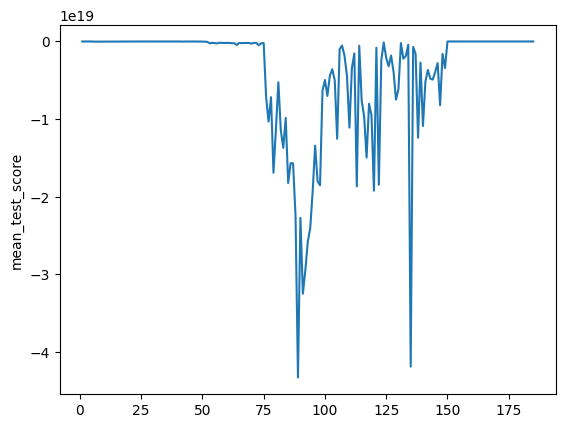

In [12]:
sns.lineplot(df_res, x = range(1, 186), y = 'mean_test_score')

In [23]:
df_new = df_res.iloc[:50, :]
df_new.mean_test_score.max()

0.33691140060502867

/home/stas/.venv/lib64/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/stas/.venv/lib64/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/stas/.venv/lib64/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/stas/.venv/lib64/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

<Axes: ylabel='mean_test_score'>

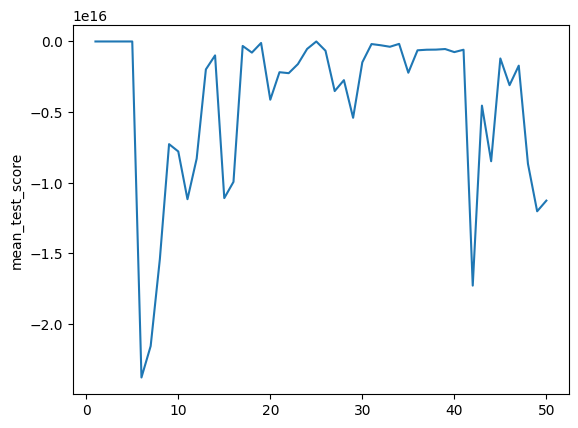

In [18]:
sns.lineplot(df_new, x = range(1, 51), y = 'mean_test_score')

## without cv

In [7]:
def feature_selection(X, y, features: list, n_features = 2):

    r2_values = []

    for n_feat in tqdm(range(1, n_features+1)):

        combs = itertools.combinations(features, n_feat)

        for feature_subset in combs:

            model = linear_model.LinearRegression()

            X_train = X[[*feature_subset]]

            model.fit(X_train, y)
            r2_value = model.score(X_train, y)

            r2_values.append((n_feat, r2_value, ' '.join(feature_subset)))

    r2_df = pd.DataFrame(r2_values, columns=['n', 'r2', 'cols'])

    return r2_df.groupby('n').max()


In [8]:
res = feature_selection(X_new, y, feats2, 2)
res

100%|██████████| 2/2 [00:00<00:00,  4.55it/s]


,r2,cols
n,,
1,0.302003,qed
2,0.338643,qed fr_tetrazole


In [9]:
res13 = feature_selection(X_new, y, feats2, 3)
res13

 67%|██████▋   | 2/3 [00:00<00:00,  4.61it/s]

100%|██████████| 3/3 [00:04<00:00,  1.37s/it]


,r2,cols
n,,
1,0.302003,qed
2,0.338643,qed fr_tetrazole
3,0.380665,qed fr_oxime fr_tetrazole


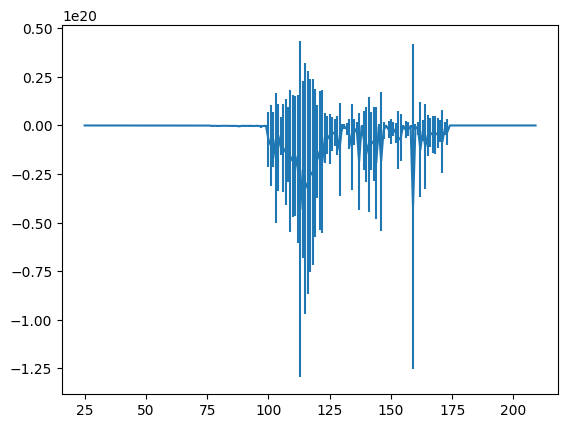

In [10]:
min_features_to_select = 25
n_scores = len(rfecv.cv_results_["mean_test_score"])

plt.errorbar(
    range(min_features_to_select, n_scores + min_features_to_select),
    rfecv.cv_results_["mean_test_score"],
    yerr=rfecv.cv_results_["std_test_score"],
)

n_scores = len(rfecv.cv_results_["mean_test_score"])


In [11]:
rfecv.cv_results_["mean_test_score"].max()


0.33691140060506036

## with cv

In [1]:
def feature_selection_cv(X, y, features: list, n_features = 2):

    r2_values = []

    for n_feat in tqdm(range(1, n_features+1)):

        combs = itertools.combinations(features, n_feat)

        for feature_subset in combs:

            model = linear_model.LinearRegression()

            X_train = X[[*feature_subset]]

            coeff = cross_val_score(model, X_train, y, cv = kf).mean() #аналогично KBest замена выбора максимального значения на среднее

            r2_values.append((n_feat, coeff, ' '.join(feature_subset)))

    r2_df = pd.DataFrame(r2_values, columns=['n', 'r2', 'cols'])

    return r2_df.groupby('n').max()


In [12]:
res2 = feature_selection_cv(X_new, y, feats2, 2)
res2

100%|██████████| 2/2 [00:02<00:00,  1.26s/it]


,r2,cols
n,,
1,0.274474,qed
2,0.311783,qed fr_tetrazole


In [13]:
res23 = feature_selection_cv(X_new, y, feats2, 3)
res23

 33%|███▎      | 1/3 [00:00<00:00,  5.52it/s]

100%|██████████| 3/3 [00:24<00:00,  8.06s/it]


,r2,cols
n,,
1,0.274474,qed
2,0.311783,qed fr_tetrazole
3,0.356733,qed fr_oxime fr_tetrazole
